In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/heart_attack_predictions.csv')

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head)
    print("##################### Tail #####################")
    print(dataframe.tail)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(623027, 30)
##################### Types #####################
Country                     object
Age                          int64
Gender                      object
Cholesterol_Level          float64
Blood_Pressure             float64
Smoking_History             object
Alcohol_Consumption        float64
Physical_Activity           object
Obesity                     object
Diabetes                    object
Family_History              object
Stress_Levels              float64
Dietary_Habits              object
Heart_Attack_History        object
Chest_Pain                  object
Exercise_Induced_Angina     object
Resting_ECG                 object
Max_Heart_Rate_Achieved      int64
Thalassemia                 object
HDL_Cholesterol            float64
LDL_Cholesterol            float64
Triglycerides              float64
Heart_Disease_Risk          object
Medication_Adherence        object
Urbanization_Level          object
Air_Pollutio

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols,num_cols,cat_but_car

(['Gender',
  'Smoking_History',
  'Physical_Activity',
  'Obesity',
  'Diabetes',
  'Family_History',
  'Dietary_Habits',
  'Heart_Attack_History',
  'Chest_Pain',
  'Exercise_Induced_Angina',
  'Resting_ECG',
  'Thalassemia',
  'Heart_Disease_Risk',
  'Medication_Adherence',
  'Urbanization_Level',
  'Access_To_Healthcare',
  'Education_Level',
  'Income_Level',
  'Heart_Attack_Outcome'],
 ['Age',
  'Cholesterol_Level',
  'Blood_Pressure',
  'Alcohol_Consumption',
  'Stress_Levels',
  'Max_Heart_Rate_Achieved',
  'HDL_Cholesterol',
  'LDL_Cholesterol',
  'Triglycerides',
  'Air_Pollution_Exposure'],
 ['Country'])

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

cat_summary(df, 'Diabetes')
num_summary(df, 'Age')

          Diabetes      Ratio
Diabetes                     
Yes         311627  50.018218
No          311400  49.981782
##########################################
count    623027.000000
mean         53.506029
std          20.791615
min          18.000000
5%           21.000000
10%          25.000000
20%          32.000000
30%          39.000000
40%          46.000000
50%          53.000000
60%          61.000000
70%          68.000000
80%          75.000000
90%          82.000000
95%          86.000000
99%          89.000000
max          89.000000
Name: Age, dtype: float64


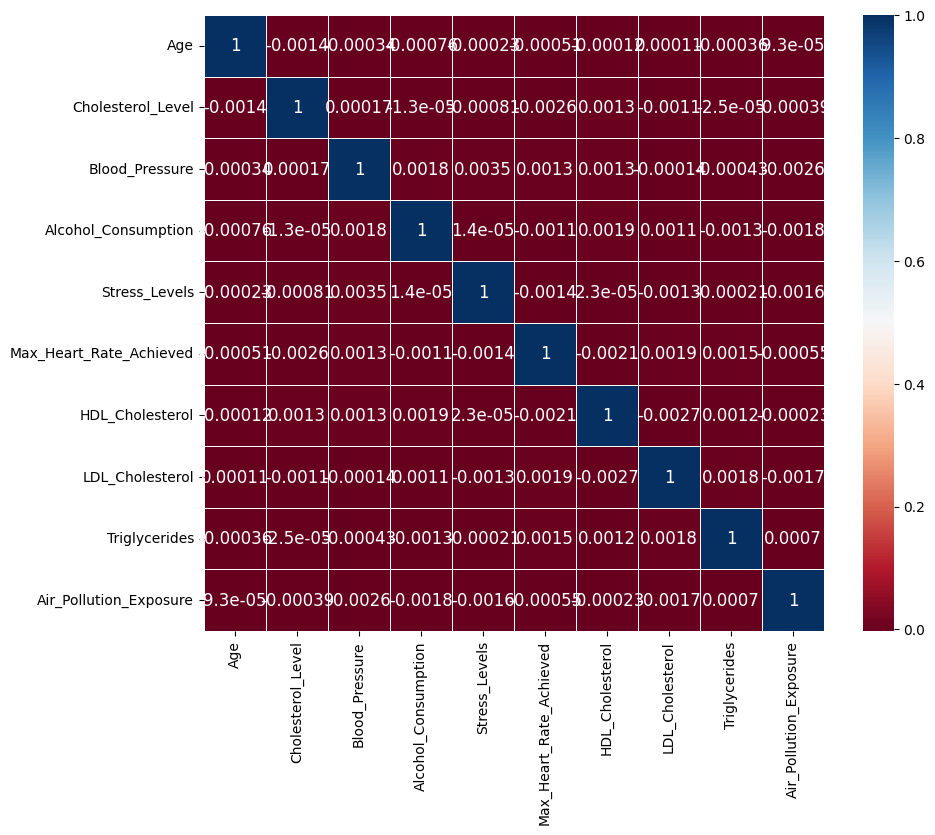

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

correlation_matrix(df, num_cols)

In [ ]:
df.drop(['Country'], axis=1, inplace=True)
df['Education_Level'] = df['Education_Level'].fillna(df['Education_Level'].mode())
df.isnull().sum()

,0
Age,0
Gender,0
Cholesterol_Level,0
Blood_Pressure,0
Smoking_History,0
Alcohol_Consumption,0
Physical_Activity,0
Obesity,0
Diabetes,0
Family_History,0


In [ ]:
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,Family_History,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,39,1,210.091036,173.301650,2,0.531933,0,0,0,1,...,68.333573,165.060897,2,0,2,51.988416,1,2,1,0
1,88,1,163.998730,137.381678,1,5.626668,2,1,1,0,...,98.194015,452.124651,2,0,1,97.739896,1,3,1,0
2,60,0,263.502590,139.737677,1,0.928015,0,0,1,0,...,118.767677,171.432620,1,0,2,60.352793,2,2,1,1
3,25,0,292.003927,85.992807,1,7.374519,0,0,1,1,...,190.190597,329.553258,2,0,2,14.397347,1,1,0,1
4,54,0,267.736563,119.882856,1,4.317845,2,1,0,0,...,188.209372,449.953074,0,1,0,69.448684,1,3,1,0


In [ ]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

y = df["Heart_Attack_Outcome"]
X = df.drop(["Heart_Attack_Outcome"], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

rf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     77928
           1       0.50      0.47      0.48     77829

    accuracy                           0.50    155757
   macro avg       0.50      0.50      0.50    155757
weighted avg       0.50      0.50      0.50    155757

